#Installing Libraries and preparing dataset

In [ ]:
!pip install palmerpenguins

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
data = penguins.drop(columns=["sex","year","island"])

In [ ]:
data["bill_length_mm"].fillna(round(data["bill_length_mm"].mean(),2), inplace=True)
data["bill_depth_mm"].fillna(round(data["bill_depth_mm"].mean(),2), inplace=True)
data["flipper_length_mm"].fillna(round(data["flipper_length_mm"].mean(),2), inplace=True)
data["body_mass_g"].fillna(round(data["body_mass_g"].mean(),2), inplace=True)

<ipython-input-52-c9fba66ece3f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["bill_length_mm"].fillna(round(data["bill_length_mm"].mean(),2), inplace=True)
<ipython-input-52-c9fba66ece3f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [ ]:
data.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.10,18.70,181.00,3750.00
1,Adelie,39.50,17.40,186.00,3800.00
2,Adelie,40.30,18.00,195.00,3250.00
3,Adelie,43.92,17.15,200.92,4201.75
4,Adelie,36.70,19.30,193.00,3450.00


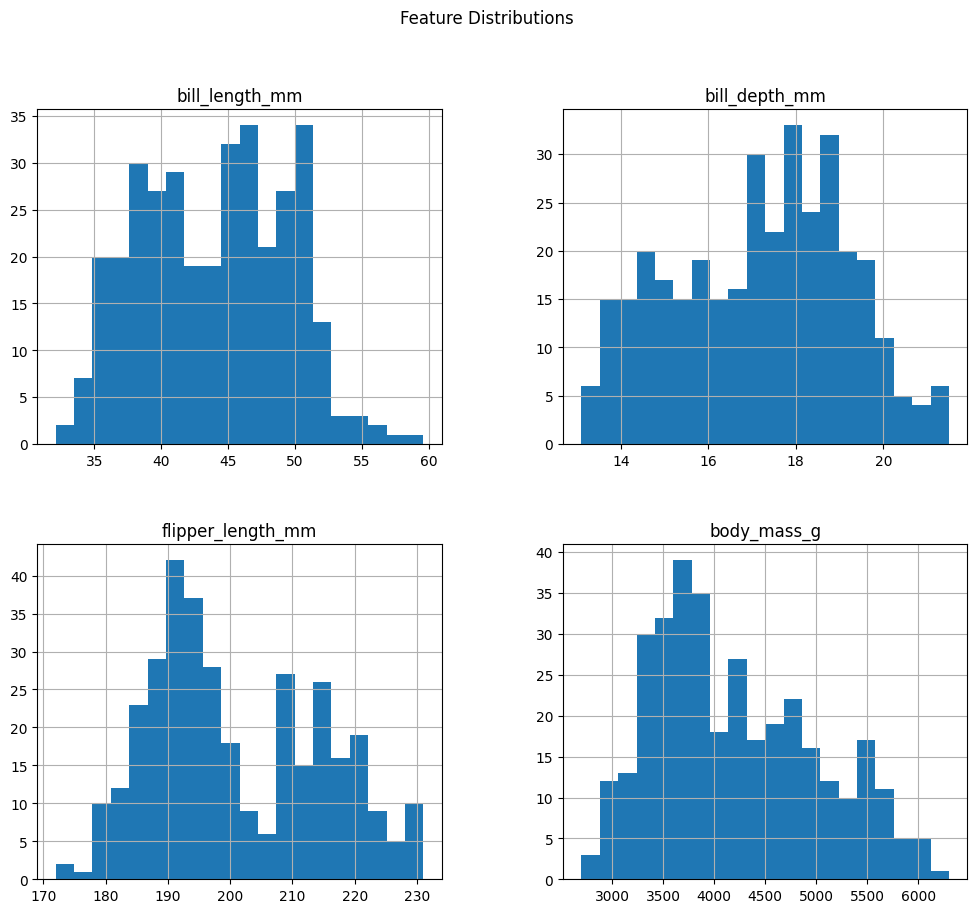

In [ ]:
data.drop(columns='species').hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

In [ ]:
X = data.drop(columns='species')
y = data['species']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["species"] = y

data = X_scaled_df

data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,-0.887079,0.787746,-1.422490,-0.565789,Adelie
1,-0.813492,0.126560,-1.065354,-0.503168,Adelie
2,-0.666317,0.431723,-0.422509,-1.192002,Adelie
3,-0.000353,-0.000591,0.000341,-0.000005,Adelie
4,-1.328603,1.092909,-0.565363,-0.941517,Adelie


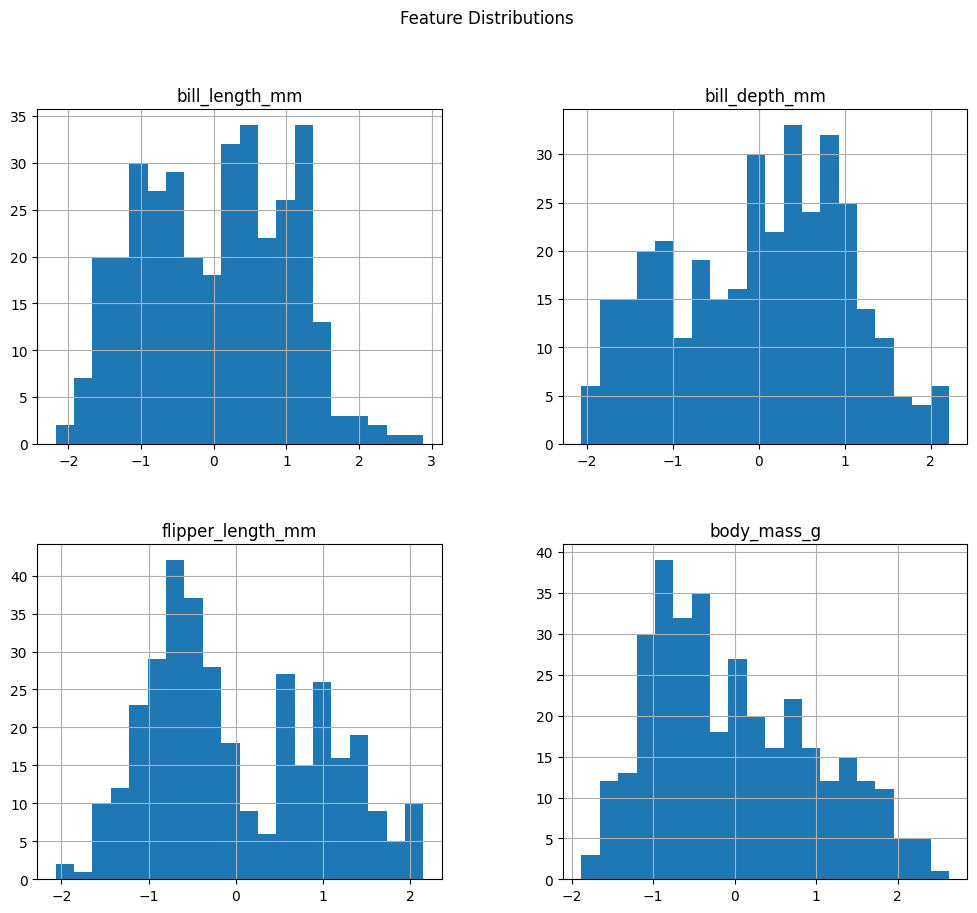

In [ ]:
data.drop(columns='species').hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

#Multiclass Perceptron Model (MCP)

Epoch 0, Training Loss: 14.47127091177507, Test Loss: 13.615869512081197
Epoch 100, Training Loss: 4.202297757686101, Test Loss: 3.985608945334967
Epoch 200, Training Loss: 4.202270862824652, Test Loss: 3.9855996884279903
Epoch 300, Training Loss: 4.202270354753148, Test Loss: 3.9855998518338587
Epoch 400, Training Loss: 4.202270348962519, Test Loss: 3.985599888336674
Epoch 500, Training Loss: 4.202270350777798, Test Loss: 3.985599894579547
Epoch 600, Training Loss: 4.202270351204648, Test Loss: 3.9855998956341376
Epoch 700, Training Loss: 4.202270351283645, Test Loss: 3.9855998958151244
Epoch 800, Training Loss: 4.202270351297605, Test Loss: 3.9855998958464642
Epoch 900, Training Loss: 4.202270351300044, Test Loss: 3.9855998958519088
Epoch 1000, Training Loss: 4.202270351300469, Test Loss: 3.985599895852856
Epoch 1100, Training Loss: 4.202270351300543, Test Loss: 3.9855998958530208
Epoch 1200, Training Loss: 4.202270351300556, Test Loss: 3.9855998958530496
Epoch 1300, Training Loss: 4

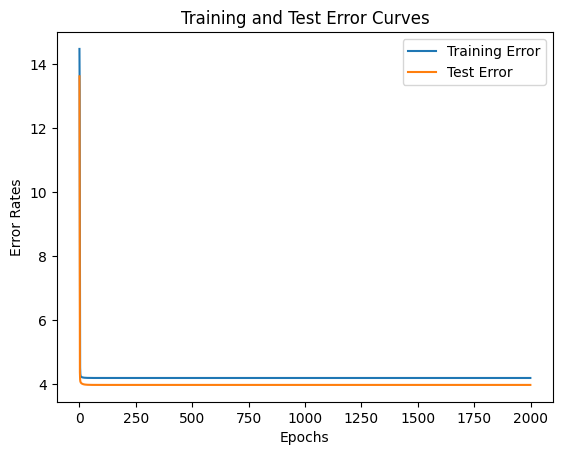

In [ ]:
X = data.drop(columns='species')
y = data['species']

class_mapping = {species: idx for idx, species in enumerate(np.unique(y))}
y_int = np.array([class_mapping[species] for species in y])  #Map to integers

y_one_hot = np.eye(3)[y_int] #One-hot encoding of the labels

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42) # Split data into training and testing sets

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def GaussianFunction(x):
    return np.exp(-x**2)

def GaussianDerivative(x):
    return -2*x*np.exp(-x**2)

def categorical_cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

class MulticlassPerceptron:
    def __init__(self, input_size, output_size, learning_rate):

        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate


        self.weights = np.random.randn(input_size, output_size) * 0.01 # Initialise weights randomly with small values
        self.bias = np.zeros((1, output_size))

    def forward(self, X):
        #Forward propagation
        self.input = X
        self.z = np.dot(X, self.weights) + self.bias  # Linear combination
        self.output = relu(self.z)  # Sigmoid activation
        return self.output

    def backward(self, X, Y):
        #Backward propagation (gradient calculation and weight update)
        output_error = self.output - Y  # Error term (difference from true values)
        output_delta = output_error * relu_derivative(self.output)  # Gradient at the output

        self.weights -= np.dot(self.input.T, output_delta) * self.learning_rate  # Weight update
        self.bias -= np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate  # Bias update

    def train(self, X_train, y_train, X_test, y_test, epochs):
        #Train the perceptron using backpropagation
        self.train_errors = []
        self.test_errors = []

        for epoch in range(epochs):

            y_pred = self.forward(X_train) # Forward pass


            self.backward(X_train, y_train) # Backward pass

            train_loss = categorical_cross_entropy(y_train, y_pred) # Calculate training error (loss)
            self.train_errors.append(train_loss)

            # Calculate test error (loss) at every epoch for evaluation
            y_test_pred = self.forward(X_test)
            test_loss = categorical_cross_entropy(y_test, y_test_pred)
            self.test_errors.append(test_loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Training Loss: {train_loss}, Test Loss: {test_loss}")

    def predict(self, X):
        #Predict the class for given input
        output = self.forward(X)
        return np.argmax(output, axis=1)  # Return class with the highest probability

# Declare learning rate and epochs outside the class
learning_rate = 0.0015
epochs = 2000

# Initialisation of multiclass perceptron
input_size = X_train.shape[1]  # 4 features per sample
output_size = y_train.shape[1]  # 3 classes
model = MulticlassPerceptron(input_size, output_size, learning_rate)

# Train the model
model.train(X_train, y_train, X_test, y_test, epochs)

def calculate_accuracy(y_true, y_pred):
    """Calculate accuracy."""
    correct = np.sum(np.argmax(y_true, axis=1) == y_pred)
    return correct / y_true.shape[0]

# Predict the test data
y_test_pred = model.predict(X_test)

# Calculate accuracy
accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Plot training and test error curves
plt.plot(model.train_errors, label='Training Error')
plt.plot(model.test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error Rates')
plt.legend()
plt.title('Training and Test Error Curves')
plt.show()



Epoch 0, Training Loss: 9.309729357492476, Test Loss: 1.5829557052564927
Epoch 100, Training Loss: 0.10941376011156768, Test Loss: 0.10194337105865005
Epoch 200, Training Loss: 0.10811441567257073, Test Loss: 0.09994724459338952
Epoch 300, Training Loss: 0.10800173861213455, Test Loss: 0.09965742281802174
Epoch 400, Training Loss: 0.10798511056915314, Test Loss: 0.09958582517184301
Epoch 500, Training Loss: 0.10798083438061347, Test Loss: 0.09956488045244347
Epoch 600, Training Loss: 0.1079796099375935, Test Loss: 0.09955862436765929
Epoch 700, Training Loss: 0.10797924719653411, Test Loss: 0.09955674512316094
Epoch 800, Training Loss: 0.10797913865774529, Test Loss: 0.09955617980691614
Epoch 900, Training Loss: 0.10797910608700648, Test Loss: 0.0995560096927635
Epoch 1000, Training Loss: 0.10797909630510336, Test Loss: 0.09955595850036378
Epoch 1100, Training Loss: 0.10797909336677841, Test Loss: 0.09955594309555343
Epoch 1200, Training Loss: 0.10797909248416604, Test Loss: 0.09955593

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:56: RuntimeWarning: invalid value encountered in subtract
  self.weights -= np.dot(self.input.T, output_delta) * self.learning_rate  # Weight update
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in r

Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 18.189663818694854, Test Loss: 0.5686808984791064
Epoch 100, Training Loss: -34.1315624780489, Test Loss: -18.267262056682352
Epoch 200, Training Loss: -80.94695546631854, Test Loss: -51.711400471190004
Epoch 300, Training Loss: -127.76234845458818, Test Loss: -85.15553888569765
Epoch 400, Training Loss: -174.5777414428578, Test Loss: -118.59967730020527
Epoch 500, 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 16.117545981673064, Test Loss: 0.4900048082683465
Epoch 100, Training Loss: -29.167902170097975, Test Loss: -34.81958493775433
Epoch 200, Training Loss: -72.13598692280353, Test Loss: -83.2162147395572
Epoch 300, Training Loss: -115.10407167550909, Test Loss: -131.6128445413601
Epoch 400, Training Loss: -158.072156428214

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 16.621426294260747, Test Loss: 0.34649921628491853
Epoch 100, Training Loss: -38.306653541411016, Test Loss: -21.993755898984336
Epoch 200, Training Loss: -89.52815036322797, Test Loss: -58.93403483535338
Epoch 300, Training Loss: -140.74964718504498, Test Loss: -95.87431377172241
Epoch 400, Training Loss: -191.97114400686195, Test Loss: -132.81459270809148
Epoch 500, Training Loss: -243.1926408286789, Test Loss: -169.75487164446045


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 12.161911232832303, Test Loss: -0.4096237899427335
Epoch 100, Training Loss: -42.94675067719273, Test Loss: -26.28915640822304
Epoch 200, Training Loss: -98.60227756497764, Test Loss: -66.61924835589328
Epoch 300, Training Loss: -154.25780445276257, Test Loss: -106.9493403035635
Epoch 400, Training Loss: -209.91333134054

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weigh

Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 7.321944778033676, Test Loss: -1.875755710844198
Epoch 100, Training Loss: 20.72326583694641, Test Loss: -90.36845273835615
Epoch 200, Training Loss: 20.72326583694641, Test Loss: -186.1247362231732
Epoch 300, Training Loss: 20.72326583694641, Test Loss: -281.88101970799016
Epoch 400, Training Loss: 20.72326583694641, Test Loss: -377.63730319280717


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)


Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 14.594718211589518, Test Loss: 0.37124359746113933
Epoch 100, Training Loss: -38.46401160940331, Test Loss: -45.96933012566586
Epoch 200, Training Loss: -90.58476009626706, Test Loss: -103.7904204461445
Epoch 300, Training Loss: -142.70550858313084, Test Loss: -161.6115107666

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination



Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 19.192665162259765, Test Loss: 1.328413485714824
Epoch 100, Training Loss: -49.6480194334541, Test Loss: -31.446611546027942
Epoch 200, Training Loss: -111.94551935098359, Test Loss: -77.5884689301158
Epoch 300, Training Loss: -174.2430192685131, Test Loss: -123.73032631420364
Epoch 400, Training Loss: -236.54051918604264, Test Loss: -169.87218369829145
Epoch 500, 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weigh

Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 14.399708875603782, Test Loss: -1.1730075168934575
Epoch 100, Training Loss: 16.998816508365476, Test Loss: -102.36827197284912
Epoch 200, Training Loss: 13.612219677218105, Test Loss: -210.3467216616059
Epoch 300, Training Loss: 10.225622846070735, Test Loss: -318.3251713503627
Epoch 400, Training Loss: 6.83902601492336

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 18.698170358836393, Test Loss: 2.936749711984366
Epoch 100, Training Loss: -52.56026903011833, Test Loss: -36.605630542660144
Epoch 200, Training Loss: -117.74386569633229, Test Loss: -87.18415559467947
Epoch 300, Training Loss: -182.92746236254627, Test Loss: -137.7626806466

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 18.550688636784855, Test Loss: -0.10015658195602291
Epoch 100, Training Loss: 16.818390308932745, Test Loss: -108.32907004080194
Epoch 200, Training Loss: 13.286509567006913, Test Loss: -223.28581641145556
Epoch 300, Training Loss: 9.754628825081081, Test Loss: -338.24256278210925
Epoch 400, Training Loss: 6.222748083155248, Test Loss: -453.1993091527628
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:56: RuntimeWarning: invalid value encountered in subtract
  self.weights -= np.dot(self.input.T, output_delta) * self.learning_rate  # Weight update
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)


Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.30019664097935, Test Loss: -0.19930892100730294
Epoch 100, Training Loss: -56.33591034097739, Test Loss: -39.18048819577329
Epoch 200, Training Loss: -125.32596788720461, Test Loss: -91.78160327512737
Epoch 300, Training Loss: -194.3160254334318, Test Loss: -144.38271835448143
Epoch 400, Training Loss: -263.30608297965904, Test Loss: -196.9838334338355
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 15.43586620435545, Test Loss: -0.9814272352788901
Epoch 100, Training Loss: 20.72326583694641, Test Loss: -113.41240779709864
Epoch 200, Training Loss: 20.72326583694641, Test Loss: -232.67752874314047
Epoch 300, Training Loss: 20.72326583694641, Test Loss: -351.94264968918236
Epoch 400, Training Loss: 20.72326583694641, Test Loss: -471.2077706352243


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 11.102025877183424, Test Loss: -1.7118676157888544
Epoch 100, Training Loss: 15.928221741808388, Test Loss: -119.21177125153126
Epoch 200, Training Loss: 11.580655683653461, Test Loss: -242.97788574351927
Epoch 300, Training Loss: 7.233089625498538, Test Loss: -366.7440002355

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 5.647910232239787, Test Loss: -2.1871488464238857
Epoch 100, Training Loss: 15.86660761600814, Test Loss: -121.59599151856426
Epoch 200, Training Loss: 11.449097984711216, Test Loss: -247.35325327908745
Epoch 300, Training Loss: 7.03158835341429, Test Loss: -373.1105150396107

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)


Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 7.432211405767421, Test Loss: -2.0718183025859043
Epoch 100, Training Loss: 20.72326583694641, Test Loss: -120.6152070691055
Epoch 200, Training Loss: 20.72326583694641, Test Loss: -245.74109348486616
Epoch 300, Training Loss: 20.72326583694641, Test Loss: -370.86697990062675


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 400, Training Loss: 20.72326583694641, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 12.882359556623308, Test Loss: -0.3980302641404949
Epoch 100, Training Loss: -48.4914480077375, Test Loss: -58.17245788565876
Epoch 200, Training Loss: -110.89607532318635, Test Loss: -128.12329692811164
Epoch 300, T

<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 8.748681950167374, Test Loss: -1.785172423469133
Epoch 100, Training Loss: 15.666721285773228, Test Loss: -129.61112432374185
Epoch 200, Training Loss: 11.053119183048556, Test Loss: -263.57752078484646
Epoch 300, Training Loss: 6

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.958724679039245, Test Loss: -1.4985973414423974
Epoch 100, Training Loss: 20.72326583694641, Test Loss: -125.48533766174016
Epoch 200, Training Loss: 20.72326583694641, Test Loss: -255.91047487567113
Epoch 300, Training Loss: 2

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)


Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 19.539747942026857, Test Loss: 0.771774366602269
Epoch 100, Training Loss: -69.38695242039017, Test Loss: -62.54330160497868
Epoch 200, Training Loss: -151.2279194758081, Test Loss: -138.02245435701101
Epoch 300, Training Loss: -2

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 14.133857903446714, Test Loss: -1.292788916778842
Epoch 100, Training Loss: 15.547209250404274, Test Loss: -134.77887846106677
Epoch 200, Training Loss: 10.754622218123162, Test Loss: -273.9425081251302
Epoch 300, Training Loss: 5.9620351858420495, Test Loss: -413.10613778919

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 14.840950323100868, Test Loss: -1.3416254477240335
Epoch 100, Training Loss: 2.2514941093483456, Test Loss: -133.18160596256308
Epoch 200, Training Loss: -15.066508534052376, Test Loss: -271.2236560186558
Epoch 300, Training Loss: -32.3845111774531, Test Loss: -409.2657060747

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.363741847594136, Test Loss: -0.33424351407632164
Epoch 100, Training Loss: -58.626027268858806, Test Loss: -69.72549627082202
Epoch 200, Training Loss: -130.7857116904828, Test Loss: -150.69826723781955
Epoch 300, Training Loss: -202.9453961121068, Test Loss: -231.67103820481708
Epoch 400, Training Loss: nan, Test Los

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.647863457341543, Test Loss: -1.3496774263865785
Epoch 100, Training Loss: 15.34722328975554, Test Loss: -139.58683518227454
Epoch 200, Training Loss: 10.389505922830622, Test Loss: -283.54539847652296
Epoch 300, Training Loss: 5.431788555905703, Test Loss: -427.50396177077147
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 8.14952171568899, Test Loss: -1.977291192727139
Epoch 100, Training Loss: 15.275286611028022, Test Loss: -144.69580976003672
Epoch 200, Training Loss: 10.265186561741562, Test Loss: -293.0279644283522
Epoch 300, Training Loss: 5.255086512455097, Test Loss: -441.3601190966679
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weigh

Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.149252610301364, Test Loss: -1.149891590313631
Epoch 100, Training Loss: 15.223754713252303, Test Loss: -144.9722823109466
Epoch 200, Training Loss: 10.162481423492931, Test Loss: -294.8195039332221
Epoch 300, Training Loss: 5.101208133733558, Test Loss: -444.6667255554975
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 12.765361601595753, Test Loss: -0.30101538283970114
Epoch 100, Training Loss: -75.8046901174535, Test Loss: -60.22257518170498
Epoch 200, Training Loss: -164.15715878701482, Test Loss: -132.9765842969564
Epoch 300, Training Loss: -252.50962745657614, Test Loss: -205.73059341220778
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 10.776362800331096, Test Loss: -1.8126423489367898
Epoch 100, Training Loss: 15.146388198762248, Test Loss: -148.80750780374063
Epoch 200, Training Loss: 9.986150858343512, Test Loss: -301.58472098798063
Epoch 300, Training Loss: 4.825913517924778, Test Loss: -454.3619341722206
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: n

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weigh

Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 16.19450066018455, Test Loss: -0.958918827697313
Epoch 100, Training Loss: -0.06710173860737334, Test Loss: -146.78411184568773
Epoch 200, Training Loss: -19.411616887558345, Test Loss: -298.0142260954299
Epoch 300, Training Loss: -38.75613203650932, Test Loss: -449.244340345172
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.864511468813026, Test Loss: -1.4171287710809148
Epoch 100, Training Loss: 15.038011102159034, Test Loss: -154.16239789660497
Epoch 200, Training Loss: 9.782958723182647, Test Loss: -312.73877144439143
Epoch 300, Training Loss: 4.527906344206258, Test Loss: -471.315144992178
Epoch 400, Training Loss: nan, Test Loss: na

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 9.63325828617169, Test Loss: -2.0122588308438814
Epoch 100, Training Loss: 14.975779795635068, Test Loss: -159.71712058936419
Epoch 200, Training Loss: 9.67475660913264, Test Loss: -322.6988893669233
Epoch 300, Training Loss: 4.373733422630211, Test Loss: -485.6806581444825
Epoch 400, Training Loss: nan, Test Loss: nan
E

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 18.337111390342955, Test Loss: 0.21381269095179628
Epoch 100, Training Loss: -81.49652784573297, Test Loss: -76.4580069860239
Epoch 200, Training Loss: -175.4350123903167, Test Loss: -164.72941198697302
Epoch 300, Training Loss: -269.3734969349004, Test Loss: -253.00081698792218
Epoch 400, Training Loss: nan, Test Loss: 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 11.806121950412832, Test Loss: -1.6591955519762691
Epoch 100, Training Loss: 14.924263626538622, Test Loss: -169.03930860345218
Epoch 200, Training Loss: 9.533964410812022, Test Loss: -340.90392127879306
Epoch 300, Training Loss: 4.143665195085425, Test Loss: -512.7685339541339
Epoch 400, Training Loss: nan, Test Loss: n

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.76472667490365, Test Loss: -1.1411317406036452
Epoch 100, Training Loss: -66.32548550529391, Test Loss: -91.78280503237586
Epoch 200, Training Loss: -147.05442876340834, Test Loss: -193.87521864265855
Epoch 300, Training Loss: -227.78337202152275, Test Loss: -295.9676322529412
Epoch 400, Training Loss: nan, Test Loss:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 14.801932852225008, Test Loss: -1.4502607434105128
Epoch 100, Training Loss: 20.72326583694641, Test Loss: -154.50366731510294
Epoch 200, Training Loss: 20.72326583694641, Test Loss: -313.51943890384246
Epoch 300, Training Loss: 20.72326583694641, Test Loss: -472.53521049258194
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: n

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination



Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.371440637250702, Test Loss: -1.3028709324711931
Epoch 100, Training Loss: 20.72326583694641, Test Loss: -155.72390397045683
Epoch 200, Training Loss: 20.72326583694641, Test Loss: -315.95413182998595
Epoch 300, Training Loss: 20.72326583694641, Test Loss: -476.1843596895152
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: n

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 14.974522869979475, Test Loss: -1.3096627564785324
Epoch 100, Training Loss: 14.747385068595527, Test Loss: -173.59968873331843
Epoch 200, Training Loss: 9.188204699110539, Test Loss: -350.8489179053036
Epoch 300, Training Loss: 3.6290243296255507, Test Loss: -528.0981470772888
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: n

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added

Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 16.366337150183252, Test Loss: -0.9476524436497151
Epoch 100, Training Loss: -1.588793099251005, Test Loss: -161.05698244904846
Epoch 200, Training Loss: -22.38718227652563, Test Loss: -326.84124400703473
Epoch 300, Training Loss: -43.185571453800264, Test Loss: -492.62550556502083
Epoch 400, Training Loss: nan, Test Los

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 6.601594388535712, Test Loss: -2.5083784495030956
Epoch 100, Training Loss: 14.67938212960032, Test Loss: -177.3664591988237
Epoch 200, Training Loss: 9.040109281053542, Test Loss: -357.16936161625716
Epoch 300, Training Loss: 3.4008364325067646, Test Loss: -536.9722640336906
Epoch 400, Training Loss: nan, Test Loss: nan

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weigh

Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 12.016416765743532, Test Loss: -1.6121002429855558
Epoch 100, Training Loss: 20.72326583694641, Test Loss: -160.4304686827102
Epoch 200, Training Loss: 20.72326583694641, Test Loss: -325.3134887696671
Epoch 300, Training Loss: 20.72326583694641, Test Loss: -490.19650885662395
Epoch 400, Training Loss: nan, Test Loss: nan

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 11.673954253756433, Test Loss: -0.32875945050539845
Epoch 100, Training Loss: -86.1869692408879, Test Loss: -79.50657448502707
Epoch 200, Training Loss: -185.00496801973298, Test Loss: -170.64306874746657
Epoch 300, Training Loss: -283.82296679857814, Test Loss: -261.77956300

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 8.89623193525455, Test Loss: -1.7008729253200143
Epoch 100, Training Loss: 20.72326583694641, Test Loss: -166.9928269374692
Epoch 200, Training Loss: 20.72326583694641, Test Loss: -337.3657138615435
Epoch 300, Training Loss: 20.72

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 11.995761725483039, Test Loss: -1.9604678209461732
Epoch 100, Training Loss: 14.487588319544566, Test Loss: -185.3664063578232
Epoch 200, Training Loss: 8.695816404373321, Test Loss: -373.32919056136205
Epoch 300, Training Loss: 2

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weigh

Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 10.665671940635328, Test Loss: -1.8330962601851173
Epoch 100, Training Loss: 14.453109602655818, Test Loss: -186.36254018890014
Epoch 200, Training Loss: 8.62468896100664, Test Loss: -375.5147007641607
Epoch 300, Training Loss: 2.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 15.736503820325558, Test Loss: -1.0975714551571716
Epoch 100, Training Loss: 14.417605290619216, Test Loss: -186.66050302371207
Epoch 200, Training Loss: 8.553087910001556, Test Loss: -376.98412609034125
Epoch 300, Training Loss: 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.943353554797303, Test Loss: 1.4054407450366972
Epoch 100, Training Loss: -73.80934363816327, Test Loss: -100.60907409133917
Epoch 200, Training Loss: -161.46766958215204, Test Loss: -211.46460752803065
Epoch 300, Training Loss: -249.1259955261408, Test Loss: -322.32014096472216
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 12.614885116035456, Test Loss: -0.3342898757707056
Epoch 100, Training Loss: -90.58304806549535, Test Loss: -86.67432462961048
Epoch 200, Training Loss: -194.02378058853677, Test Loss: -184.67145481151294
Epoch 300, Training Loss: -297.4645131115781, Test Loss: -282.66858499341544
Epoch 400, Training Loss: nan, Test Loss

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.892381293294893, Test Loss: -0.4276855677234483
Epoch 100, Training Loss: -75.04072949447426, Test Loss: -101.98718601445789
Epoch 200, Training Loss: -163.7329141454203, Test Loss: -214.1501703660932
Epoch 300, Training Loss: -252.4250987963663, Test Loss: -326.3131547177286
Epoch 400, Training Loss: nan, Test Loss: 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 14.187979639934863, Test Loss: -0.8262830380739027
Epoch 100, Training Loss: -75.40081259259713, Test Loss: -102.5203763600175
Epoch 200, Training Loss: -164.5989606832717, Test Loss: -215.32321832251355
Epoch 300, Training Loss: nan, Test Loss: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 14.920274129934414, Test Loss: -0.4110523003648112
Epoch 100, Training Loss: -75.96331391294392, Test Loss: -103.32790999368963
Epoch 200, Training Loss: -165.66040273014693, Test Loss: -216.76172841845514
Epoch 300, Training Loss

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weigh

Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 20.51058223496902, Test Loss: 1.8766806657930857
Epoch 100, Training Loss: -202.0948333275822, Test Loss: 17.02523672610044
Epoch 200, Training Loss: -409.3565756291115, Test Loss: 13.568989128445931
Epoch 300, Training Loss: nan, Test Loss: nan
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: nan,

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 18.441111080792123, Test Loss: 0.9260314779836517
Epoch 100, Training Loss: -94.60271438554517, Test Loss: -88.78258872546913
Epoch 200, Training Loss: -201.84299130625706, Test Loss: -189.5533214275638
Epoch 300, Training Loss: nan, Test Loss: nan
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: n

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 17.027795472904867, Test Loss: -0.24748327775790085
Epoch 100, Training Loss: -77.3107988398419, Test Loss: -104.15483519094334
Epoch 200, Training Loss: -168.46455993920898, Test Loss: -219.43080815314462
Epoch 300, Training Loss: nan, Test Loss: nan
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 6.456249430506869, Test Loss: -2.538484462724685
Epoch 100, Training Loss: 14.116583072788952, Test Loss: -198.31071345162286
Epoch 200, Training Loss: 7.949411200690775, Test Loss: -398.45650867965384
Epoch 300, Training Loss: nan, Test Loss: nan
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: na

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 6.354998418385097, Test Loss: -2.5037945862174245
Epoch 100, Training Loss: 14.086213673480085, Test Loss: -199.35174542181647
Epoch 200, Training Loss: 7.887629360870878, Test Loss: -400.5169816540098
Epoch 300, Training Loss: nan, Test Loss: nan
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: na

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 5.2152907387511895, Test Loss: -2.714411412136856
Epoch 100, Training Loss: 14.097130208848192, Test Loss: -200.23503639220863
Epoch 200, Training Loss: 7.8675326432832895, Test Loss: -402.4067586287094
Epoch 300, Training Loss: nan, Test Loss: nan
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss: n

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.371616440386093, Test Loss: -0.6109492615574057
Epoch 100, Training Loss: -79.18291839322147, Test Loss: -107.55536357303147
Epoch 200, Training Loss: -172.1919327078892, Test Loss: -225.17754931796028
Epoch 300, Training Loss: nan, Test Loss: nan
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan
Epoch 600, Training Loss:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 7.111541289593925, Test Loss: -2.560841716428667
Epoch 100, Training Loss: 13.987822497717424, Test Loss: -202.15442222231007
Epoch 200, Training Loss: 7.697354470562026, Test Loss: -406.3015988799931
Epoch 300, Training Loss: nan, Test Loss: nan
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan, Test Loss: nan


<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:25: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Added small epsilon (1e-9) to avoid log(0)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan
Epoch 0, Training Loss: 13.451510095301211, Test Loss: -1.9026743600169245
Epoch 100, Training Loss: 13.97505089976481, Test Loss: -202.7707407418272
Epoch 200, Training Loss: 7.654705948726792, Test Loss: -407.8875256435269
Epoch 300, Training Loss: nan, Test Loss: nan
Epoch 400, Training Loss: nan, Test Loss: nan
Epoch 500, Training Loss: nan

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-67-36f554edd893>:47: RuntimeWarning: invalid value encountered in add
  self.z = np.dot(X, self.weights) + self.bias  # Linear combination


Epoch 600, Training Loss: nan, Test Loss: nan
Epoch 700, Training Loss: nan, Test Loss: nan
Epoch 800, Training Loss: nan, Test Loss: nan
Epoch 900, Training Loss: nan, Test Loss: nan
Epoch 1000, Training Loss: nan, Test Loss: nan
Epoch 1100, Training Loss: nan, Test Loss: nan
Epoch 1200, Training Loss: nan, Test Loss: nan
Epoch 1300, Training Loss: nan, Test Loss: nan
Epoch 1400, Training Loss: nan, Test Loss: nan
Epoch 1500, Training Loss: nan, Test Loss: nan
Epoch 1600, Training Loss: nan, Test Loss: nan
Epoch 1700, Training Loss: nan, Test Loss: nan
Epoch 1800, Training Loss: nan, Test Loss: nan
Epoch 1900, Training Loss: nan, Test Loss: nan


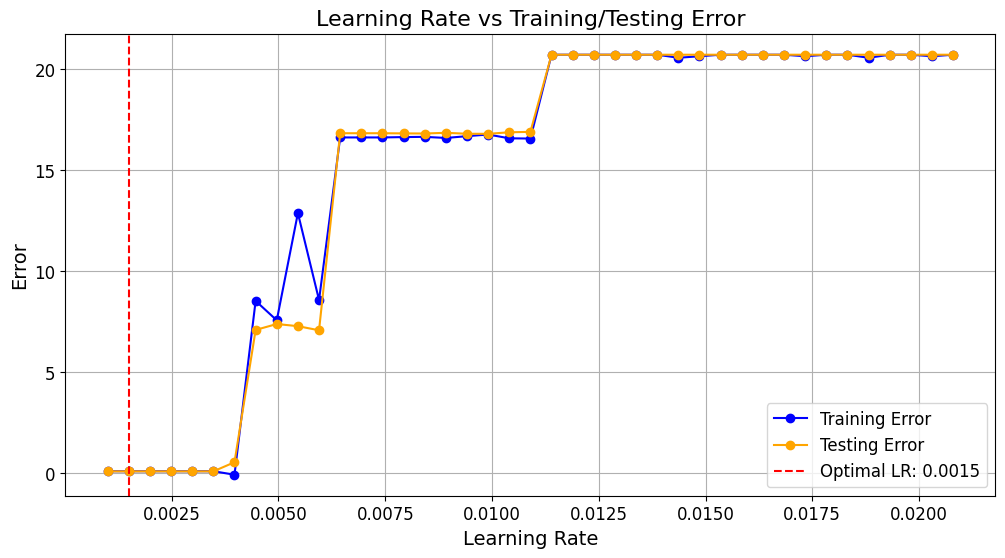

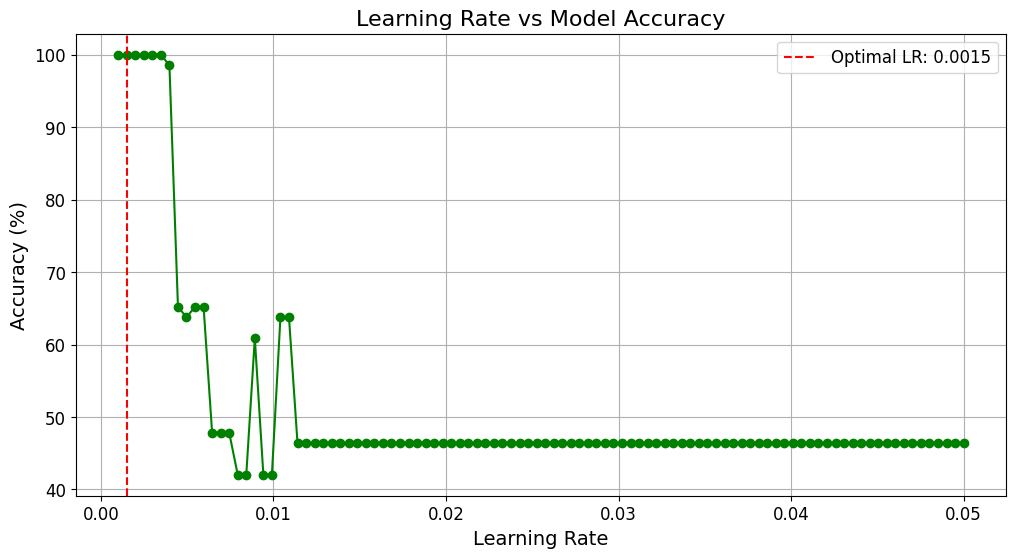

In [ ]:
learning_rates = np.linspace(0.001, 0.05, 100)  # 50 values between 0.001 and 0.05
train_errors = []
test_errors = []
accuracies = []

# Iterate over learning rates
for lr in learning_rates:
    # Initialize and train the model
    model = MulticlassPerceptron(input_size, output_size, lr)
    model.train(X_train, y_train, X_test, y_test, epochs)

    # Append the last training and testing error for this learning rate
    train_errors.append(model.train_errors[-1])  # Last training error
    test_errors.append(model.test_errors[-1])    # Last testing error

    # Predict on test set and calculate accuracy
    y_test_pred = model.predict(X_test)
    accuracy = calculate_accuracy(y_test, y_test_pred)
    accuracies.append(accuracy * 100)  # Convert to percentage

# Find the learning rate corresponding to the minimum testing error
min_test_error = min(test_errors)
optimal_lr = learning_rates[test_errors.index(min_test_error)]

# Plot Training and Testing Errors
plt.figure(figsize=(12, 6))
plt.plot(learning_rates, train_errors, label='Training Error', marker='o', linestyle='-', color='blue')
plt.plot(learning_rates, test_errors, label='Testing Error', marker='o', linestyle='-', color='orange')
plt.axvline(optimal_lr, color='red', linestyle='--', label=f'Optimal LR: {optimal_lr:.4f}')
plt.title('Learning Rate vs Training/Testing Error', fontsize=16)
plt.xlabel('Learning Rate', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot Learning Rate vs Accuracy
plt.figure(figsize=(12, 6))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='green')
plt.axvline(optimal_lr, color='red', linestyle='--', label=f'Optimal LR: {optimal_lr:.4f}')
plt.title('Learning Rate vs Model Accuracy', fontsize=16)
plt.xlabel('Learning Rate', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Epoch 0, Training Loss: 16.974338087704858, Test Loss: 11.083862836965402
Epoch 100, Training Loss: 7.459240512348613, Test Loss: 7.684822184344882
Epoch 200, Training Loss: 7.457909122690421, Test Loss: 7.681816524999549
Epoch 300, Training Loss: 7.457793564950879, Test Loss: 7.681294063239173
Epoch 400, Training Loss: 7.457771664368484, Test Loss: 7.681166875135619
Epoch 500, Training Loss: 7.457766197046158, Test Loss: 7.681133997367397
Epoch 600, Training Loss: 7.457764734718734, Test Loss: 7.681125359221025
Epoch 700, Training Loss: 7.457764337083512, Test Loss: 7.681123072008528
Epoch 800, Training Loss: 7.457764228421876, Test Loss: 7.681122462925741
Epoch 900, Training Loss: 7.457764198659604, Test Loss: 7.681122299928806
Epoch 1000, Training Loss: 7.457764190495149, Test Loss: 7.681122256118762
Epoch 1100, Training Loss: 7.457764188252711, Test Loss: 7.681122244297988
Epoch 1200, Training Loss: 7.457764187636177, Test Loss: 7.681122241097629
Epoch 1300, Training Loss: 7.457764

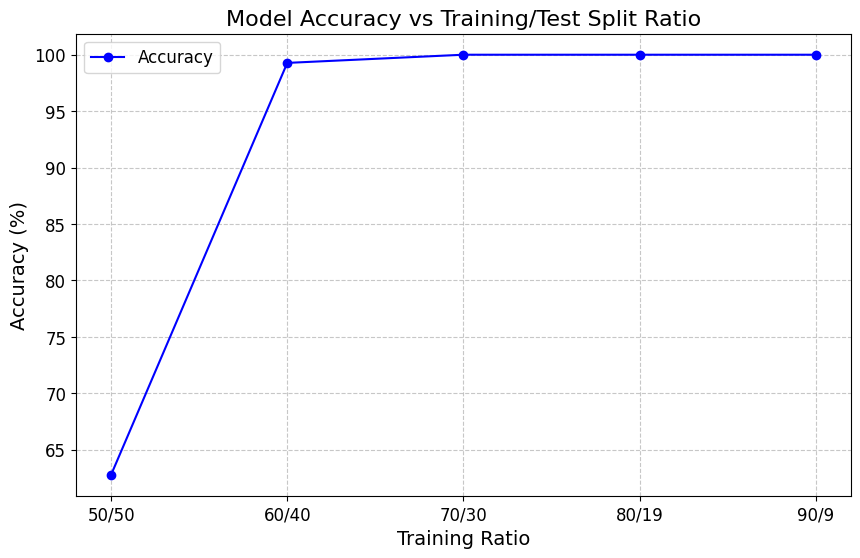

In [ ]:
optimal_lr = 0.0015
optimal_epochs = 2000

split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]

accuracies = []

for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=1 - split_ratio, random_state=42)

    model = MulticlassPerceptron(input_size, output_size, optimal_lr)

    model.train(X_train, y_train, X_test, y_test, optimal_epochs)

    y_test_pred = model.predict(X_test)
    accuracy = calculate_accuracy(y_test, y_test_pred)
    accuracies.append(accuracy * 100)  # Convert to percentage

print("\nTraining/Test Split Ratio and Accuracy")
print("-" * 40)
print("{:<20} {:<10}".format("Training Ratio", "Accuracy (%)"))
for split_ratio, acc in zip(split_ratios, accuracies):
    print(f"{split_ratio:<20} {acc:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(split_ratios, accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.title("Model Accuracy vs Training/Test Split Ratio", fontsize=16)
plt.xlabel("Training Ratio", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(split_ratios, labels=[f"{int(r*100)}/{int((1-r)*100)}" for r in split_ratios], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

#MCP + Cross Validation

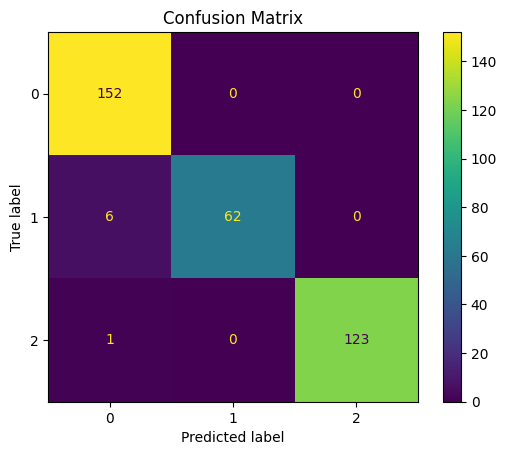

Mean Validation Error: 0.134045
Mean Test Error: 0.107918


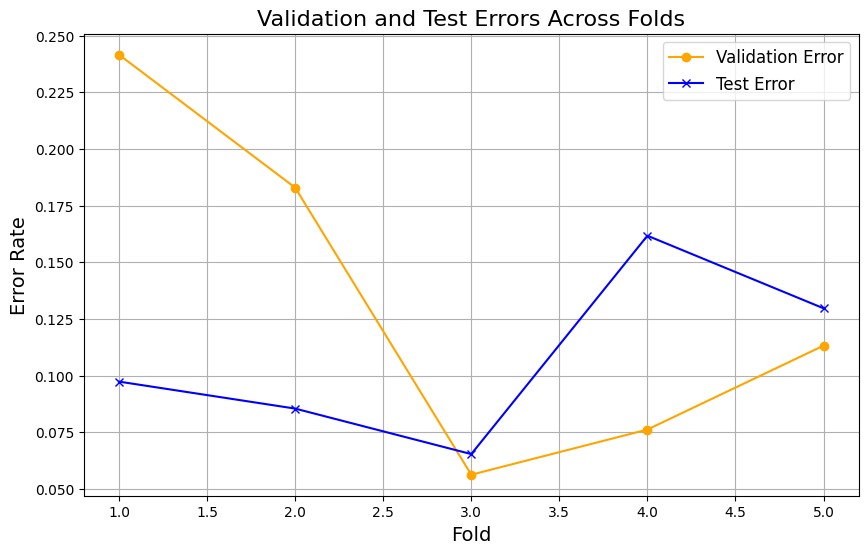

In [ ]:
class MulticlassPerceptron:
    def __init__(self, input_size, output_size, learning_rate):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def forward(self, X):
        self.z = np.dot(X, self.weights) + self.bias
        self.output = relu(self.z)
        return self.output

    def backward(self, X, Y):
        error = self.output - Y
        delta = error * relu_derivative(self.output)
        self.weights -= np.dot(X.T, delta) * self.learning_rate
        self.bias -= np.sum(delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, Y, epochs):
        losses = []
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, Y)
            losses.append(categorical_cross_entropy(Y, self.output))
        return losses

    def predict(self, X):
        predictions = self.forward(X)
        return np.argmax(predictions, axis=1)

def calculate_accuracy(y_true, y_pred):
    correct = np.sum(np.argmax(y_true, axis=1) == y_pred)
    return correct / y_true.shape[0]

fixed_learning_rate = 0.0015
epochs = 2000

# Cross-validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store errors
validation_errors = []
test_errors = []

all_true_labels = []
all_predicted_labels = []

# Iterate over K-Folds
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_one_hot[train_index], y_one_hot[test_index]

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    model = MulticlassPerceptron(input_size=X.shape[1], output_size=y_one_hot.shape[1], learning_rate=fixed_learning_rate)

    model.train(X_train, y_train, epochs)

    val_loss = categorical_cross_entropy(y_val, model.forward(X_val))
    validation_errors.append(val_loss)

    test_loss = categorical_cross_entropy(y_test, model.forward(X_test))
    test_errors.append(test_loss)

    y_pred = model.predict(X_test)

    # Store true and predicted labels
    all_true_labels.extend(np.argmax(y_test, axis=1))
    all_predicted_labels.extend(y_pred)


cm = confusion_matrix(all_true_labels, all_predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(np.argmax(y_one_hot, axis=1)))
disp.plot(cmap="viridis", colorbar=True)
plt.title("Confusion Matrix")
plt.show()

# Calculate mean errors across folds
mean_validation_error = np.mean(validation_errors)
mean_test_error = np.mean(test_errors)

# Display results
print(f"Mean Validation Error: {mean_validation_error:.6f}")
print(f"Mean Test Error: {mean_test_error:.6f}")

# Plot validation and test errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(validation_errors) + 1), validation_errors, label="Validation Error", marker='o', color="orange")
plt.plot(range(1, len(test_errors) + 1), test_errors, label="Test Error", marker='x', color="blue")
plt.xlabel("Fold", fontsize=14)
plt.ylabel("Error Rate", fontsize=14)
plt.title("Validation and Test Errors Across Folds", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


#MLP with CV (1 Hidden Layer)

Training Fold 1/5
Fold 1 completed.
Training Fold 2/5
Fold 2 completed.
Training Fold 3/5
Fold 3 completed.
Training Fold 4/5
Fold 4 completed.
Training Fold 5/5
Fold 5 completed.
Model Accuracy on Test Set: 100.00%


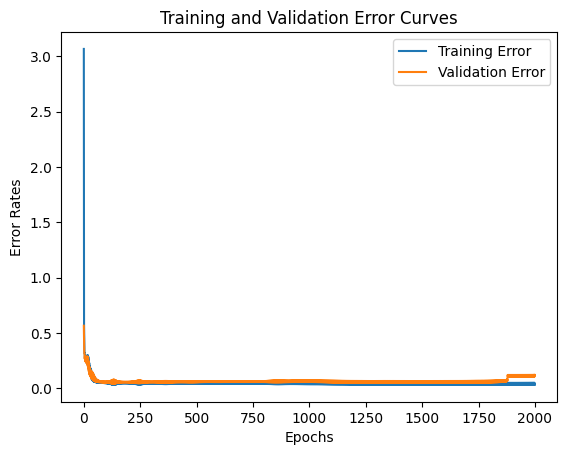

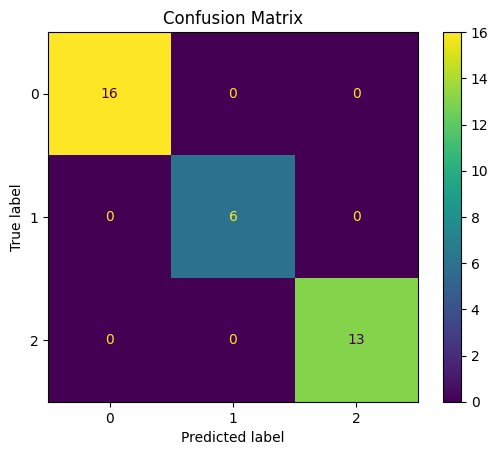

In [ ]:
X = data.drop(columns='species')
y = data['species']

class_mapping = {species: idx for idx, species in enumerate(np.unique(y))}
y_int = np.array([class_mapping[species] for species in y])  #Map to integers

y_one_hot = np.eye(3)[y_int] #One-hot encoding of the labels

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.1, random_state=42) # Split data into training and testing sets

def categorical_cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Adding small epsilon to avoid log(0)

# MLP class with sigmoid activation for both layers
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights1 = np.random.randn(input_size, hidden_size) * 0.01
        self.bias1 = np.zeros((1, hidden_size))

        self.weights2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias2 = np.zeros((1, output_size))

    def forward(self, X):
        self.input = X
        self.hidden = relu(np.dot(X, self.weights1) + self.bias1)  # Hidden layer
        self.output = relu(np.dot(self.hidden, self.weights2) + self.bias2)  # Output layer
        return self.output

    def backward(self, X, Y):
        # Output layer error
        output_error = self.output - Y
        output_delta = output_error * relu_derivative(self.output)

        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights2.T)
        hidden_delta = hidden_error * relu_derivative(self.hidden)

        # Update weights and biases
        self.weights2 -= np.dot(self.hidden.T, output_delta) * self.learning_rate
        self.bias2 -= np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate

        self.weights1 -= np.dot(X.T, hidden_delta) * self.learning_rate
        self.bias1 -= np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate

    def train_with_cross_validation(self, X, y, kfolds, epochs):
        kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)
        self.train_errors = np.zeros(epochs)
        self.val_errors = np.zeros(epochs)

        for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
            print(f"Training Fold {fold + 1}/{kfolds}")
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            for epoch in range(epochs):
                y_pred = self.forward(X_train)
                self.backward(X_train, y_train)

                train_loss = categorical_cross_entropy(y_train, y_pred)
                self.train_errors[epoch] += train_loss / kfolds

                y_val_pred = self.forward(X_val)
                val_loss = categorical_cross_entropy(y_val, y_val_pred)
                self.val_errors[epoch] += val_loss / kfolds

            print(f"Fold {fold + 1} completed.")

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

input_size = X_train.shape[1]
hidden_size = 3  # Number of perceptrons in the hidden layer
output_size = y_train.shape[1]
learning_rate = 0.0015
epochs = 2000
kfolds = 5

# Create and train the MLP model
model = MLP(input_size, hidden_size, output_size, learning_rate)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Train the model using K-Fold Cross-Validation
model.train_with_cross_validation(X_train, y_train, kfolds, epochs)

# Calculate accuracy on test set
def calculate_accuracy(y_true, y_pred):
    correct = np.sum(np.argmax(y_true, axis=1) == y_pred)
    return correct / y_true.shape[0]

y_test_pred = model.predict(X_test)
accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")

# Plot training and validation error curves
plt.plot(model.train_errors, label='Training Error')
plt.plot(model.val_errors, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error Rates')
plt.legend()
plt.title('Training and Validation Error Curves')
plt.show()

true_labels = np.argmax(y_test, axis=1)  # Convert one-hot to class labels
conf_matrix = confusion_matrix(true_labels, y_test_pred)

#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(true_labels))
disp.plot(cmap="viridis", colorbar=True)
plt.title("Confusion Matrix")
plt.show()

#MLP with CV (Multiple Hidden Layers)

Training Fold 1/5
Fold 1 completed.
Training Fold 2/5
Fold 2 completed.
Training Fold 3/5
Fold 3 completed.
Training Fold 4/5
Fold 4 completed.
Training Fold 5/5
Fold 5 completed.
Model Accuracy on Test Set: 45.71%


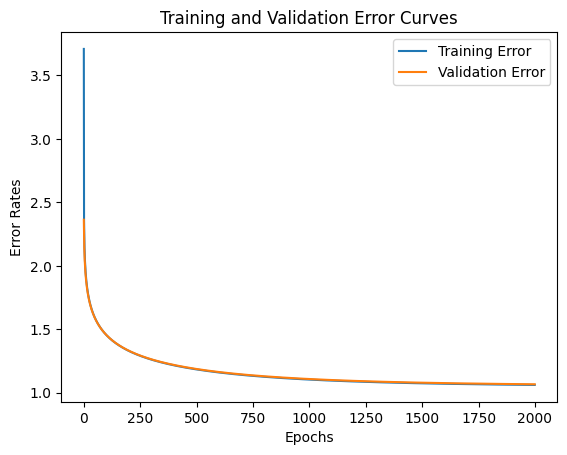

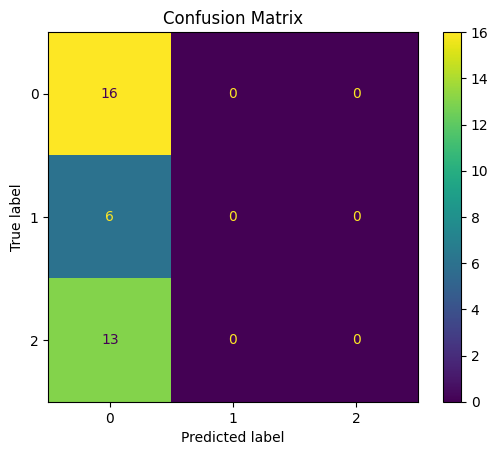

In [ ]:
class ExtendedMLP:
    def __init__(self, layer_sizes, learning_rate):

        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate

        self.weights = []
        self.biases = []
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01)
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def forward(self, X):

        self.activations = [X]  # Storing activations for all layers (input included)
        for i in range(len(self.weights) - 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.activations.append(relu(z))

        # Output layer
        z_output = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        self.activations.append(relu(z_output))
        return self.activations[-1]

    def backward(self, Y):

        m = Y.shape[0]  # Number of samples
        deltas = [self.activations[-1] - Y]

        # Backpropagate through all layers
        for i in reversed(range(len(self.weights))):
            delta = deltas[0]  # Current layer delta
            grad_weights = np.dot(self.activations[i].T, delta) / m
            grad_biases = np.sum(delta, axis=0, keepdims=True) / m


            self.weights[i] -= self.learning_rate * grad_weights
            self.biases[i] -= self.learning_rate * grad_biases


            if i > 0:
                deltas.insert(0, np.dot(delta, self.weights[i].T) * relu_derivative(self.activations[i]))

    def train_with_cross_validation(self, X, y, kfolds, epochs):

        kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)
        self.train_errors = np.zeros(epochs)
        self.val_errors = np.zeros(epochs)

        for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
            print(f"Training Fold {fold + 1}/{kfolds}")
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            for epoch in range(epochs):
                self.forward(X_train)
                self.backward(y_train)

                train_loss = categorical_cross_entropy(y_train, self.activations[-1])
                self.train_errors[epoch] += train_loss / kfolds

                val_loss = categorical_cross_entropy(y_val, self.forward(X_val))
                self.val_errors[epoch] += val_loss / kfolds

            print(f"Fold {fold + 1} completed.")

    def predict(self, X):
        """
        Predict class labels for given input data.
        Args:
            X: Input data.
        Returns:
            Predicted class labels.
        """
        output = self.forward(X)
        return np.argmax(output, axis=1)


layer_sizes = [X_train.shape[1], 4, 3, 3]  # Input, two hidden layers (4 and 3 neurons), output
learning_rate = 0.0015
epochs = 2000
kfolds = 5

model = ExtendedMLP(layer_sizes=layer_sizes, learning_rate=learning_rate)

X_train = np.array(X_train)
y_train = np.array(y_train)

model.train_with_cross_validation(X_train, y_train, kfolds, epochs)

y_test_pred = model.predict(X_test)
accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")

plt.plot(model.train_errors, label='Training Error')
plt.plot(model.val_errors, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error Rates')
plt.legend()
plt.title('Training and Validation Error Curves')
plt.show()

# Confusion Matrix
true_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(true_labels, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(true_labels))
disp.plot(cmap="viridis", colorbar=True)
plt.title("Confusion Matrix")
plt.show()
